## Implemention of ML algorithms to gain insight about `orientation`!

We will now start implementing the steps required to implement ML models, including, preprocessing, fitting, evaluating / tuning, testing, and then a final conclusion.

In [1]:
%store -r daters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
import seaborn as sns
%timeit
%matplotlib inline

### Data preparation

#### Missing Data

Missing data is usually not handled well by ML algorithms and so we will either have to remove it or impute it.

In [2]:
daters.isnull().sum()

age                    0
body_type           5295
diet               24394
drinks              2983
drugs              14079
education           6627
essay0              5486
essay1              7570
essay2              9636
essay3             11475
essay4             10535
essay5             10848
essay6             13769
essay7             12449
essay8             19223
essay9             12601
ethnicity           5678
height                 3
income                 0
job                 8197
last_online            0
location               0
offspring          35560
orientation            0
pets               19919
religion           20225
sex                    0
sign               11055
smokes              5511
speaks                50
status                 0
dietCleaned        24394
religionCleaned    20225
signCleaned        11055
dtype: int64

#### Pre-processing

Preparing the data for modelling is very important as it can both speed up the process as well as improve efficiency / accuracy. The old saying goes "garbage in, garbage out" so we want to make sure our data is suited well to the question we are trying to answer.

We will only use a subset of the data to make our predictions. The variables were chosen as they seemed to be good potential predictors for the `orientation` labels.  

We will also drop `NaN` values so that we have a complete dataset!

In [3]:
cols = ['orientation','body_type','dietCleaned','drinks','drugs',\
        'religionCleaned','sex','smokes','signCleaned','pets']
df = daters[cols].dropna()
df.shape

(13436, 10)

#### Dummy variables

We will convert the categorical variables into dummy variables for use in our ML models.

In [4]:
for col in cols[1:]:
    df = pd.get_dummies(df, columns=[col], prefix=[col])

In [5]:
df.head()

,orientation,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats
0,straight,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,straight,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,straight,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,straight,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,straight,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Label Imbalance

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions.

In [6]:
print(df.orientation.value_counts())

straight    11573
gay          1118
bisexual      745
Name: orientation, dtype: int64


As we can see, our data contains WAY more straight people than gay or bisexual people. This means there is a massive label imbalance for our outcome variable!

In [7]:
straight_sample = df[df.orientation == 'straight'].sample(745,random_state=1)
gay_sample = df[df.orientation == 'gay'].sample(745,random_state = 1)
bisexual_sample = df[df.orientation == 'bisexual']

df = pd.concat([straight_sample,gay_sample,bisexual_sample])
print(df.orientation.value_counts())

straight    745
gay         745
bisexual    745
Name: orientation, dtype: int64


#### Splitting Data

The data needs to be split into a training and validation set. We will reserve 20% of the data for the validation set.

In [8]:
# select our predictor variables into X and our outcome variables into y
X = df.iloc[:,1:]
y = df.iloc[:,0]

# import the train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

val_size = .2

# split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=val_size,random_state=20)

# turn into 1d-arrays
y_train = y_train.to_numpy().ravel()
y_val = y_val.to_numpy().ravel()

y_train.shape, y_val.shape

((1788,), (447,))

### Prediction

#### Model building 

Now it's time to create some models, here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. For this project three common algorithms will be used to make predictions.

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics

In the models, there will be several values that can be evaluated:
- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#### MODEL 1: Logistic Regression

In [11]:
LogReg = LogisticRegression(multi_class='multinomial',max_iter=1000)
LogReg.fit(X_train,y_train)
LogReg_pred = LogReg.predict(X_val)
LogReg_accuracy = accuracy_score(y_val,LogReg_pred)
print(f'The accuracy of our Logistic Regression model is {np.round(LogReg_accuracy*100,1)}%.')

The accuracy of our Logistic Regression model is 50.8%.


In [12]:
print(classification_report(y_val, LogReg_pred))

              precision    recall  f1-score   support

    bisexual       0.60      0.63      0.61       155
         gay       0.39      0.51      0.44       126
    straight       0.55      0.40      0.46       166

    accuracy                           0.51       447
   macro avg       0.51      0.51      0.50       447
weighted avg       0.52      0.51      0.51       447



Our Logistic Regression model does not seem to do bad, it has an accuracy of 50.8%! i.e. it makes correct predictions half of the time!

#### MODEL 2: K Nearest Neighbours (KNN)

The default number of neighbours is 5, but we will tune our `n_neighbours` parameter to obtain the best possible model!

In [13]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_preds = KNN.predict(X_val)
KNN_default_accuracy = accuracy_score(y_val,KNN_preds)
print(f'The accuracy of our K Nearest Neighbours Classifier using default hyperparameters \
is {np.round(KNN_default_accuracy*100,1)}%.')

The accuracy of our K Nearest Neighbours Classifier using default hyperparameters is 45.9%.


Let's now test the KNN algorithm using different `n_neighbours` to see how our accuracy changes, and whether we can find a better accuracy than using the default `n_neighbours = 5`:

In [14]:
ks, KNN_scores = [],[]
for k in range(1,100):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    KNN_preds = KNN.predict(X_val)
    KNN_accuracy = accuracy_score(y_val,KNN_preds)
    ks.append(k)
    KNN_scores.append(KNN_accuracy)

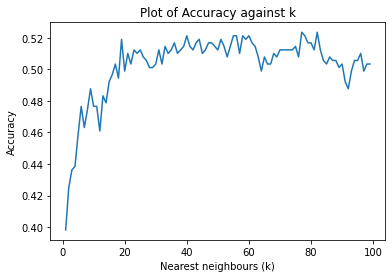

     k  accuracy
76  77  0.523490
81  82  0.523490
59  60  0.521253
57  58  0.521253
55  56  0.521253
Our best K Nearest Neighbours model is obtained with k = 77 with an accuracy of 52.3%.


In [15]:
ks = np.array(ks)
KNN_scores = np.array(KNN_scores)
plt.plot(ks,KNN_scores)
plt.xlabel('Nearest neighbours (k)')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy against k')

plt.show()

# make DataFrame of k's with corresponding accuracies for easy access
KNN_scores_df = pd.DataFrame({'k':ks,'accuracy':KNN_scores})

# get top 5 k's with best accuracies
print(KNN_scores_df.sort_values(by='accuracy',ascending=False)[:5])

KNN_best_k = KNN_scores_df.iloc[KNN_scores_df.accuracy.argmax(),0]
KNN_best_k_accuracy = KNN_scores_df.accuracy.max()

print(f'Our best K Nearest Neighbours model is obtained with k = {KNN_best_k} \
with an accuracy of {np.round(KNN_best_k_accuracy*100,1)}%.')

Our best KNN model is obtained with k = 77 or k = 82 (nearest neighbours). Our accuracy is slightly higher than the Logistic Regression model, indicating this is a potentially better model to use! 

#### MODEL 3: Decision Trees

In [16]:
DTree = DecisionTreeClassifier(random_state=0)
DTree.fit(X_train,y_train)
DTree_preds = DTree.predict(X_val)
DTree_default_accuracy = accuracy_score(y_val,DTree_preds)
print(f'The accuracy of our Decision Tree model with default parameters is \
{np.round(DTree_default_accuracy*100,1)}%.')

The accuracy of our Decision Tree model with default parameters is 43.0%.


Our default decision tree with default hyperparameters (cost complexity parameter (ccp_alpha) set to zero and automatic max_depth) gives us a bad accuracy_score. Below, we will change the max_depth as well as ccp_alpha to get a better model and try to avoid overfitting!

*Note*: **We will keep the random_state parameter set to 0 so that we don't randomise our trees everytime!**

*Note*: **The terms score and accuracy are used (and will be used here) interchangeably in ML jargon**

In [17]:
# See hyperparameters we can set in DecisionTreesClassifier()
DTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

#### 3.1 Finding best depth (`max_depth`) leaving other hyperparameters as default

We set a range of depths to test our classifier against, and then find the depth that gives us the best score.

In [18]:
# set range of depths we will test
depths_to_test = range(1,21)

# initialise list to store the classifiers with max_depth changed
clfs_DepthOnly = []
for depth in depths_to_test:
    clf = DecisionTreeClassifier(max_depth=depth,random_state=0)
    clf.fit(X_train,y_train)
    clfs_DepthOnly.append(clf)
    
# store train and test scores for classifiers
clfs_DepthOnly_train_scores = [clf.score(X_train,y_train) for clf in clfs_DepthOnly]
clfs_DepthOnly_test_scores = [clf.score(X_val,y_val) for clf in clfs_DepthOnly]

We can now plot both the train and test scores against the different depths to visualise how our accuracy changes with `max_depth`:

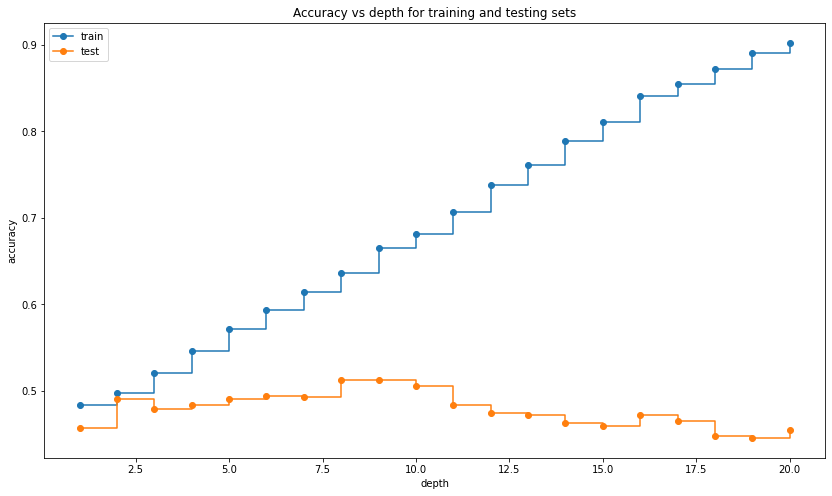

In [19]:
fig= plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.set_xlabel("depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs depth for training and testing sets")
ax.plot(depths_to_test, clfs_DepthOnly_train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(depths_to_test, clfs_DepthOnly_test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We can see that as the depth increases, our model becomes more prone to overfitting as the train score goes up but the test score comes down. The sweet spot is somehwere between 7.5 and 10!

Below, we find the exact depth that gives us the best test score:

In [20]:
# create array of depths and correspoending accuracies for easy access
dt_DepthOnly_accuracy_array = np.array(list(zip(depths_to_test,clfs_DepthOnly_test_scores)))

# get best depth and corresponding accuracy leaving other hyperparameters default
best_depth_other_hyperparams_default = np.argmax(dt_DepthOnly_accuracy_array[:,1])+1 #add 1 as index starts from 0
best_depth_other_hyperparams_default_accuracy = np.array(clfs_DepthOnly_test_scores).max()

print(f'Our best Decision Tree changing only max_depth and leaving other hyperparameters default \
gives an accuracy of {np.round(best_depth_other_hyperparams_default_accuracy*100,1)}% \
with max_depth = {best_depth_other_hyperparams_default}.')

Our best Decision Tree changing only max_depth and leaving other hyperparameters default gives an accuracy of 51.2% with max_depth = 8.


`max_depth` = 8 gives the best accuracy with other hypermarameters default! We can already see how our accuracy has improved by tuning this hyperparameter! 

Let's now see how our model performs using different 'Cost Complexity Parameters' or CCPs (ccp_alpha)!

#### 3.2 Finding best CCP (`ccp_alpha`) leaving otherhyperparameters as default

We build classifiers with different ccp's and then find the ccp that gives us the best score.

In [21]:
# get different ccp_alphas to test
path = DTree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas_to_test = path.ccp_alphas

# initialise list to store the classifiers with ccp_alpha changed
clfs_CCPOnly = []
for ccp_alpha in ccp_alphas_to_test:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=0)
    clf.fit(X_train, y_train)
    clfs_CCPOnly.append(clf)

# we remove the trivial tree which has only one node
clfs_CCPOnly = clfs_CCPOnly[:-1]
ccp_alphas_to_test = ccp_alphas_to_test[:-1]

# store train and test scores for classifiers
clfs_CCPOnly_train_scores = [clf.score(X_train,y_train) for clf in clfs_CCPOnly]
clfs_CCPOnly_test_scores = [clf.score(X_val,y_val) for clf in clfs_CCPOnly]

We can now plot both the train and test scores against the different CCPs to visualise how our accuracy changes with `ccp_alpha`:

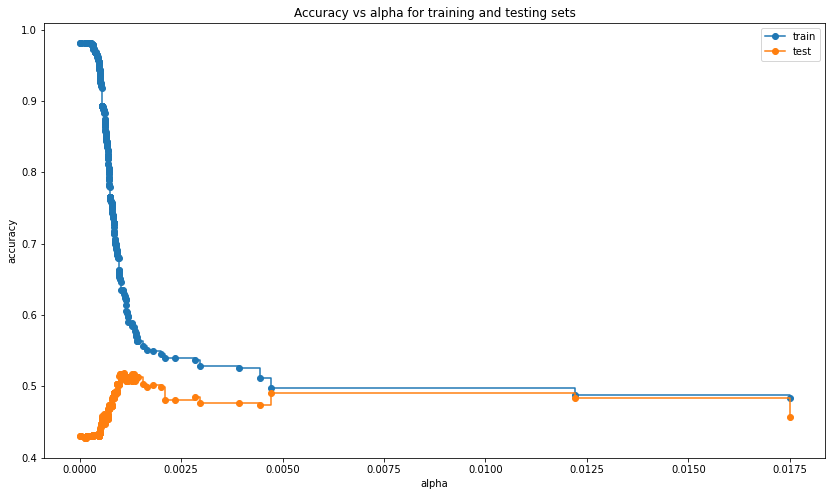

In [22]:
fig= plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_to_test, clfs_CCPOnly_train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_to_test, clfs_CCPOnly_test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We can see that values of alpha close to 0 lead to overfitting since the train score is very high compared to the test score, so just from eyeballing, a value around 0.00125 seems to give the best accuracy score!

Below, we will find the CCP that gives us the best test score:

In [23]:
# get ccp_alpha that gives best accuracy
dt_CCPOnly_accuracy_df = pd.DataFrame({'ccp_alpha':ccp_alphas_to_test,'accuracy':clfs_CCPOnly_test_scores})

best_ccp_other_hyperparams_default = dt_CCPOnly_accuracy_df.iloc[dt_CCPOnly_accuracy_df.accuracy.argmax(),0]
best_ccp_other_hyperparams_default_accuracy = dt_CCPOnly_accuracy_df.accuracy.max() 

print(f'Our best Decision Tree changing only ccp_alpha and leaving other hyperparameters default \
gives an accuracy of {np.round(best_ccp_other_hyperparams_default_accuracy*100,1)}% \
with ccp_alpha = {best_ccp_other_hyperparams_default}.')

Our best Decision Tree changing only ccp_alpha and leaving other hyperparameters default gives an accuracy of 51.9% with ccp_alpha = 0.0010939953520117576.


`ccp_alpha` ~ 0.001094 gives the best accuracy with other hypermarameters default! This is a s;ight improvement over the model where we only changed the `max_depth`.

#### 3.3 Finding best combination of `ccp_alpha` and `max_depth`

We can now choose our final Decision Tree, by first selecting the DecisionTree with the ccp that gives the best accuracy, and then testing this tree with different depths to get the best Tree obtained by tuning these two hyperparameters!

In [24]:
# intialise empty list to store our final decision trees
final_DecisionTrees = []

# test dtree with best ccp_alpha using different depths
for depth in depths_to_test:
    clf = DecisionTreeClassifier(max_depth=depth,\
                                 ccp_alpha=best_ccp_other_hyperparams_default,\
                                 random_state=0)
    clf.fit(X_train,y_train)
    final_DecisionTrees.append(clf)
    
final_DecisionTrees_train_scores = [dt.score(X_train, y_train) for dt in final_DecisionTrees]
final_DecisionTrees_test_scores = [dt.score(X_val, y_val) for dt in final_DecisionTrees]

We can now plot both the train and test scores against the different depths to visualise how our accuracy changes with `max_depth`:

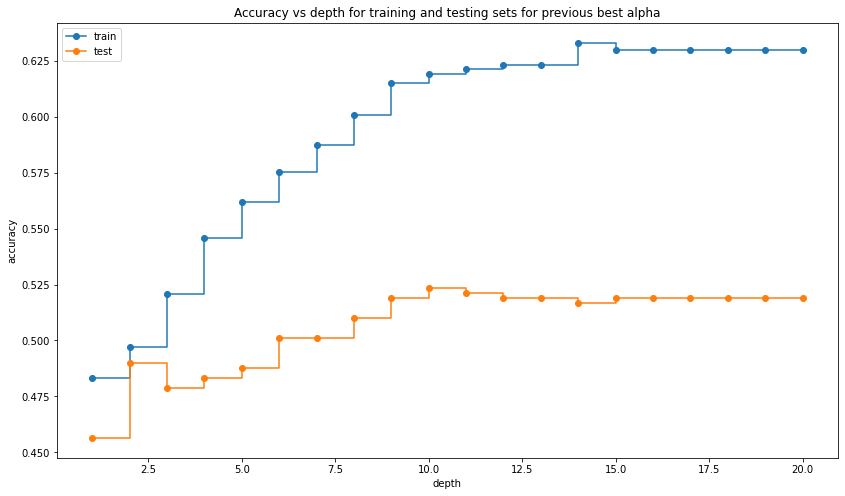

In [25]:
fig= plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.set_xlabel("depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs depth for training and testing sets for previous best alpha")
ax.plot(depths_to_test, final_DecisionTrees_train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(depths_to_test, final_DecisionTrees_test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [26]:
finalDTree_depths_accuracy_df = pd.DataFrame({'depths':pd.Series(depths_to_test),'accuracy':final_DecisionTrees_test_scores})
finalDTree_max_acc = finalDTree_depths_accuracy_df.accuracy.max()
finalDTree_max_acc_depth = finalDTree_depths_accuracy_df.iloc[finalDTree_depths_accuracy_df.accuracy.argmax(),0]
finalDTree_max_acc_alpha = best_ccp_other_hyperparams_default

print(f'The best accuracy of {np.round(finalDTree_max_acc*100,1)}% in our final DecisionTreeClassifier \
was obtained with a max_depth of {finalDTree_max_acc_depth} \
and cost complexity parameter alpha of {finalDTree_max_acc_alpha}.')

The best accuracy of 52.3% in our final DecisionTreeClassifier was obtained with a max_depth of 10 and cost complexity parameter alpha of 0.0010939953520117576.


### Conclusion

In this project, machine learning using scikit-learn was used to predict the sexual orientation of users on OkCupid's dating app. We tried 3 different supervised algorithms, but got no farther predicting correct labels only half of the time. We had to significantly reduce the size of our dataset due to label imbalance as the majority of users have their sexual orientation as straight. A suggestion to OkCupid is to attract more gay and bisexual people towards their apps. We present a final breakdown summary of how each model performed below!

1. Create heatmap of confusion matrix for each model to visualise where the model went wrong:

In [27]:
from sklearn.metrics import confusion_matrix

best_DTree = DecisionTreeClassifier(random_state=0,\
                                    max_depth=finalDTree_max_acc_depth,\
                                    ccp_alpha=finalDTree_max_acc_alpha)

%timeit best_DTree.fit(X_train,y_train)
best_DTree_pred = best_DTree.predict(X_val)
best_DTree_cm = confusion_matrix(y_val, best_DTree_pred)
best_DTree_labels = best_DTree.classes_

best_KNN = KNeighborsClassifier(n_neighbors=KNN_best_k)

%timeit best_KNN.fit(X_train,y_train)
best_KNN_pred = best_KNN.predict(X_val)
best_KNN_cm = confusion_matrix(y_val, best_KNN_pred)
best_KNN_labels = best_KNN.classes_

best_LogReg = LogisticRegression(max_iter=500)
%timeit best_LogReg.fit(X_train,y_train)
best_LogReg_pred = best_LogReg.predict(X_val)
LogReg_cm = confusion_matrix(y_val, best_LogReg_pred)
LogReg_labels = LogReg.classes_

11.9 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.72 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
215 ms ± 7.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[Text(0, 0.5, 'bisexual'), Text(0, 1.5, 'gay'), Text(0, 2.5, 'straight')]

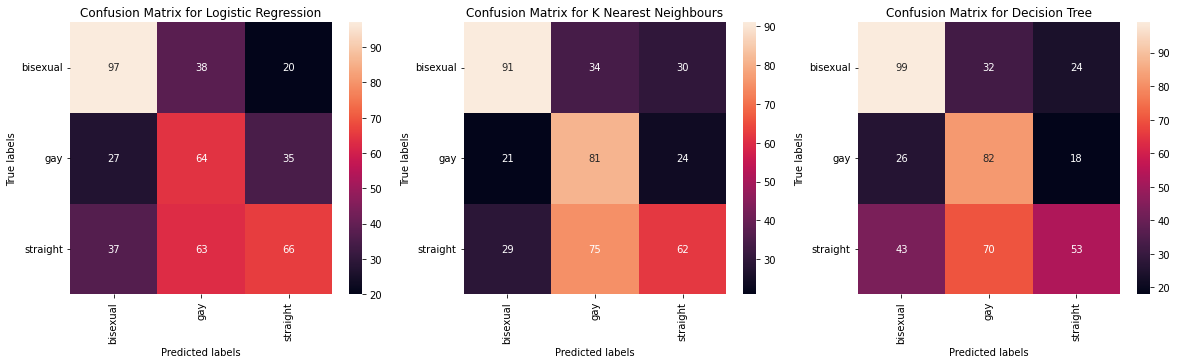

In [28]:
plt.figure(figsize=(20,5))

# create heatmap of confusion matrix for Logistic Regression
ax = plt.subplot(1,3,1)

sns.heatmap(LogReg_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(LogReg_labels) 
ax.yaxis.set_ticklabels(LogReg_labels)

# create heatmap of confusion matrix for K Nearest Neighbours
ax2 = plt.subplot(1,3,2)

sns.heatmap(best_KNN_cm, annot=True, ax = ax2,fmt="d");

# labels, title and ticks
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix for K Nearest Neighbours');
ax2.yaxis.set_tick_params(rotation=360)
ax2.xaxis.set_tick_params(rotation=90)

ax2.xaxis.set_ticklabels(best_KNN_labels) 
ax2.yaxis.set_ticklabels(best_KNN_labels)

# create heatmap of confusion matrix for Decision Tree
ax3 = plt.subplot(1,3,3)
sns.heatmap(best_DTree_cm, annot=True, ax = ax3,fmt="d");

# labels, title and ticks
ax3.set_xlabel('Predicted labels');
ax3.set_ylabel('True labels'); 
ax3.set_title('Confusion Matrix for Decision Tree');
ax3.yaxis.set_tick_params(rotation=360)
ax3.xaxis.set_tick_params(rotation=90)

ax3.xaxis.set_ticklabels(best_DTree_labels) 
ax3.yaxis.set_ticklabels(best_DTree_labels)

2. Final Summary of accuracy and parameters:

In [29]:
print(f'The accuracy of our Logistic Regression model was {np.round(LogReg_accuracy*100,1)}%. \
Our best K Nearest Neighbours model was obtained with k = {KNN_best_k} \
giving an accuracy of {np.round(KNN_best_k_accuracy*100,1)}%. \
The best accuracy of {np.round(finalDTree_max_acc*100,1)}% in our final DecisionTreeClassifier \
was obtained with a max_depth of {finalDTree_max_acc_depth} \
and cost complexity parameter alpha of {finalDTree_max_acc_alpha}.')

The accuracy of our Logistic Regression model was 50.8%. Our best K Nearest Neighbours model was obtained with k = 77 giving an accuracy of 52.3%. The best accuracy of 52.3% in our final DecisionTreeClassifier was obtained with a max_depth of 10 and cost complexity parameter alpha of 0.0010939953520117576.


As we can see, the KNN and Decision Tree algorithms performed equally well, and we can see from their confusion matrix that their predictions for gay are similar but they differ in the other 2 classes' predictions. Overall, the models don't perform great, predicting 1/2 times correctly. This is better than a guessing mechanism at least!

### Future Suggestions / Improvements

As mentioned before, OkCupid needs to attract more gay and bisexual people to use their app by perhaps giving them some sort of incentive, such as fast matching (apps like grindr target these groups specifically and do very well). If there was more training data available, perhaps the model would perform much better. 

Perhaps more models can be tried, and the fields `essay-x` can be utilised using NLP techniques to give better predictions. This is probably a good idea as perhaps the algorithms can pick up words that bisexual and gay people use more than straight people, for example.